In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_total = None
start_time = pd.Timestamp('20000101')
id = 0
for i in range(1,15):
    df = pd.read_csv(f"../data/meditation/physionet.org/files/meditation/1.0.0/data/metron/M{i}", sep='\t', names=['ds', 'y'])
    df['ds'] = start_time + df['ds'].apply(int) * pd.Timedelta(1, unit='sec')
    df = df.drop_duplicates(subset=['ds'])
    # print(df['ds'].apply(int))
    df.insert(0, 'unique_id', id)
    if len(df) < 598:
        continue
    if len(df) == 599:
        df = df.drop(0)
    print(max(df['ds']), len(df))
    if id == 0:
        df_total = df
    else:
        df_total = pd.concat([df_total, df])
    id += 1
# df = pd.read_csv("../data/meditation/physionet.org/files/meditation/1.0.0/data/metron/M1", sep='\t', names=['ds', 'y'])
df_total

2000-01-01 00:09:58 598
2000-01-01 00:09:58 598
2000-01-01 00:09:58 598
2000-01-01 00:09:58 598
2000-01-01 00:09:58 598
2000-01-01 00:09:58 598


,unique_id,ds,y
0,0,2000-01-01 00:00:01,90.9091
2,0,2000-01-01 00:00:02,86.2069
3,0,2000-01-01 00:00:03,87.7193
5,0,2000-01-01 00:00:04,86.2069
6,0,2000-01-01 00:00:05,82.8729
...,...,...,...
694,5,2000-01-01 00:09:54,71.4286
695,5,2000-01-01 00:09:55,69.1244
696,5,2000-01-01 00:09:56,68.4931
697,5,2000-01-01 00:09:57,75.3769


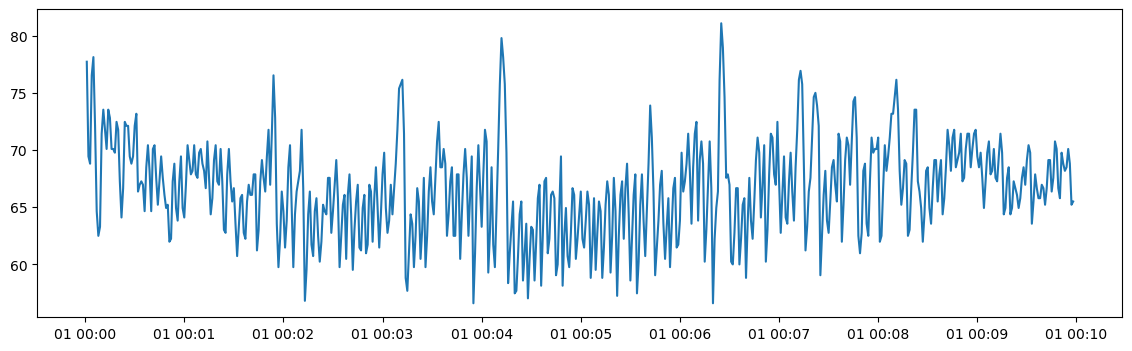

In [8]:
plt.figure(figsize=(14,4))
id = 1
plt.plot(df_total.loc[df_total['unique_id']==id,'ds'], df_total.loc[df_total['unique_id']==id,'y'])
plt.show()

In [4]:
# df_total.to_csv('../data/meditation/y_meditation.csv')